In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d  # Optional, for 3D visualization
import matplotlib.cm as cm


In [65]:
# Path to the directory containing the point clouds
base_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/semantic_segemntation/plantNet_segmentation"  # Change this to your actual path
save_dir = "/Users/noahbucher/Documents/Uni/Master Thesis/Writing/graphs/results/segmentation"  # Set your save directory

# List all files in the directory
all_files = os.listdir(base_path)

# Filter files starting with "4096" and containing "_bw_"
filtered_files = [f for f in all_files if f.startswith("4096") and "_bw_" in f]

# Sort files by the bandwidth value after "_bw_"
sorted_files = sorted(filtered_files, key=lambda x: float(x.split("_bw_")[-1].replace(".txt", "")))

# Check sorted files
sorted_files


['4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.07.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.09.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.1.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.2.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.3.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.4.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.42.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.45.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.48.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.52.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.53.txt',
 '4096_cleaned_normals_processed_s_pc_C-3_2024-08-07_dense_02_pred_bw_0.54.txt',
 '4096_cleaned_normals_processed

In [66]:
# Load one point cloud file
file_to_load = os.path.join(base_path, sorted_files[0])  # Load the first sorted file

# Assuming the file contains columns with point cloud data (XYZ and maybe other attributes)
point_cloud = np.loadtxt(file_to_load)

# Check the shape of the data to verify
print(point_cloud.shape)


(3811, 6)


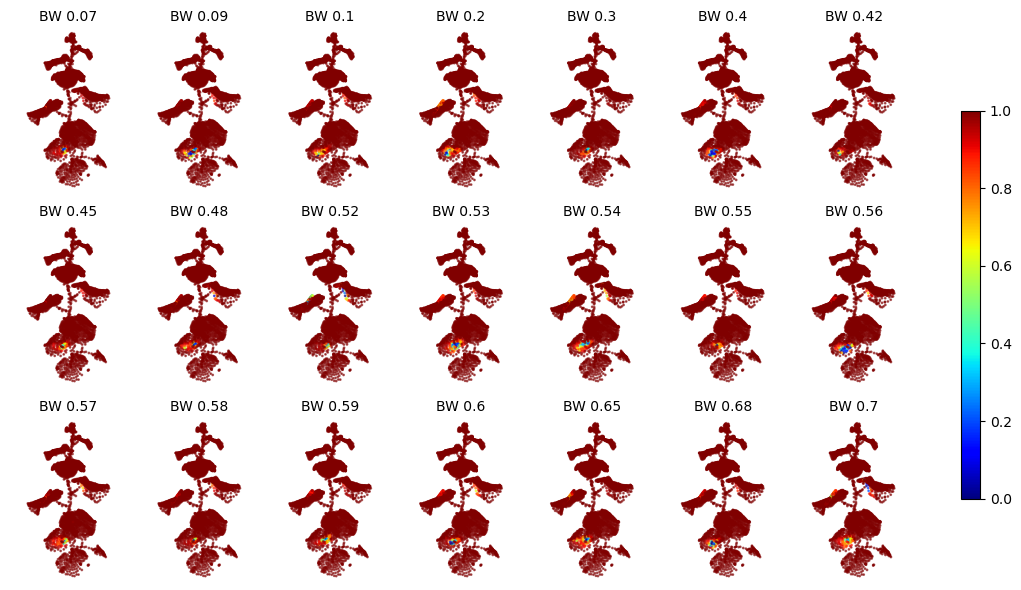

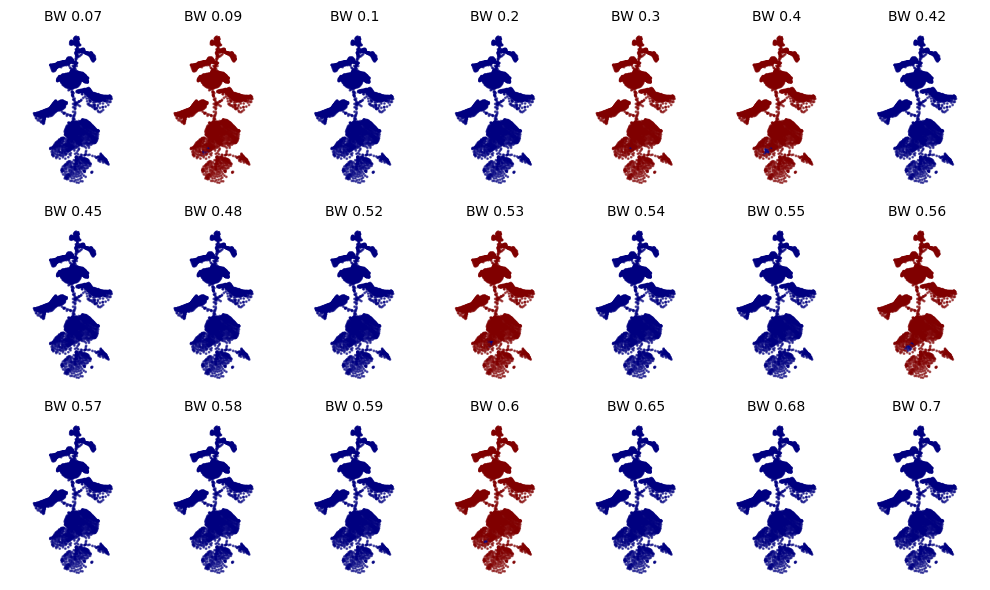

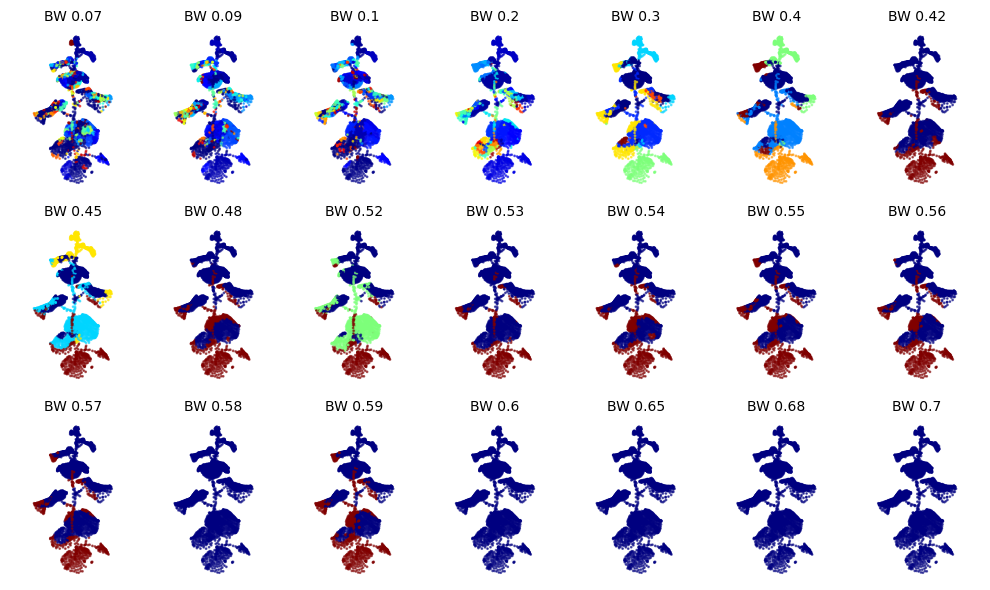

In [68]:
# Set up the number of rows and columns based on the number of files
n_files = len(sorted_files)
n_cols = 7  # Adjust the number of columns as needed
n_rows = (n_files + n_cols - 1) // n_cols  # Calculate the number of rows

# Function to plot data with labels on a given subplot axis
# def plot_on_subplot(ax, x, z, labels, title):
#     scatter = ax.scatter(x, z, c=labels, cmap='jet', s=1, alpha=0.6)
#     ax.set_title(title, fontsize=10)
#     ax.set_xlabel('X')
#     ax.set_ylabel('Z')
#     ax.axis('equal')
#     return scatter

# Function to plot data with labels on a given subplot axis
def plot_on_subplot(ax, x, z, labels, title):
    scatter = ax.scatter(x, z, c=labels, cmap='jet', s=1, alpha=0.6)
    ax.set_title(title, fontsize=10)
    ax.axis('equal')
    ax.axis('off')  # Turn off the axis
    ax.set_frame_on(False)  # Turn off the border/frame
    return scatter

figsizes = (10, 6)
# Create the 3 figures for instance, semantic, and object labels
fig_instance, axs_instance = plt.subplots(n_rows, n_cols, figsize=figsizes)
fig_semantic, axs_semantic = plt.subplots(n_rows, n_cols, figsize=figsizes)
fig_object, axs_object = plt.subplots(n_rows, n_cols, figsize=figsizes)

# Loop through all files and plot in the respective subplots
for idx, file_name in enumerate(sorted_files):
    # Load the point cloud
    file_path = os.path.join(base_path, file_name)
    point_cloud = np.loadtxt(file_path)
    
    # Extract the X, Z coordinates (XZ plane)
    x_coords = point_cloud[:, 0]  # X values
    z_coords = point_cloud[:, 2]  # Z values

    # Extract the labels
    instance_labels = point_cloud[:, 3]
    semantic_labels = point_cloud[:, 4]
    object_labels = point_cloud[:, 5]

    # Get the row and column index for the current subplot
    row = idx // n_cols
    col = idx % n_cols
    
    # Plot on the respective subplot for instance labels
    plot_on_subplot(axs_instance[row, col], x_coords, z_coords, instance_labels, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")}')
    
    # Plot on the respective subplot for semantic labels
    plot_on_subplot(axs_semantic[row, col], x_coords, z_coords, semantic_labels, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")}')
    
    # Plot on the respective subplot for object labels
    plot_on_subplot(axs_object[row, col], x_coords, z_coords, object_labels, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")}')

# Adjust layout for better visibility
fig_instance.tight_layout()
fig_semantic.tight_layout()
fig_object.tight_layout()


# Add colorbars to each figure
fig_instance.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_instance, location='right', fraction=0.02)
# fig_semantic.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_semantic, location='right', fraction=0.02)
# fig_object.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_object, location='right', fraction=0.02)

# Save the figures
# Save each plot with a specific name in the save_dir folder
confidence_plot_path = os.path.join(save_dir, "C-3_confidence_scores_plot.png")
semantic_labels_plot_path = os.path.join(save_dir, "C-3_semantic_labels_plot.png")
object_labels_plot_path = os.path.join(save_dir, "C-3_object_labels_plot.png")

fig_instance.savefig(confidence_plot_path, dpi=300)
fig_semantic.savefig(semantic_labels_plot_path, dpi=300)
fig_object.savefig(object_labels_plot_path, dpi=300)

# Display the plots
plt.show()

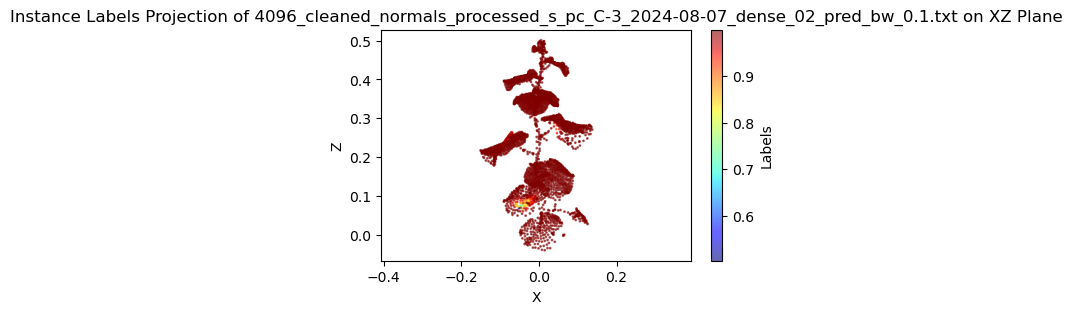

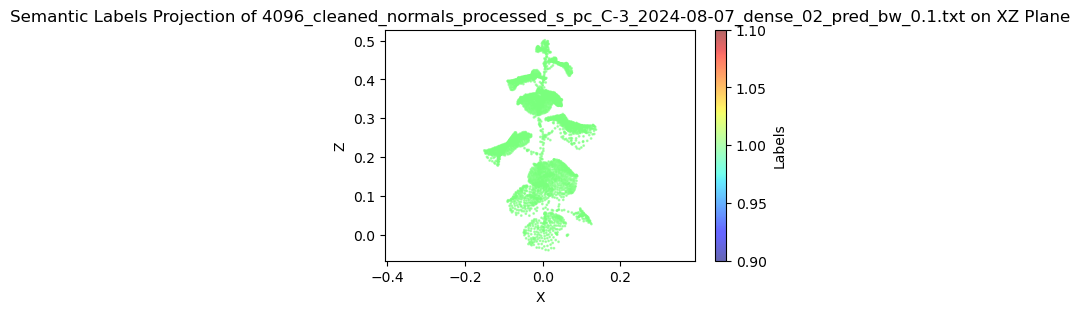

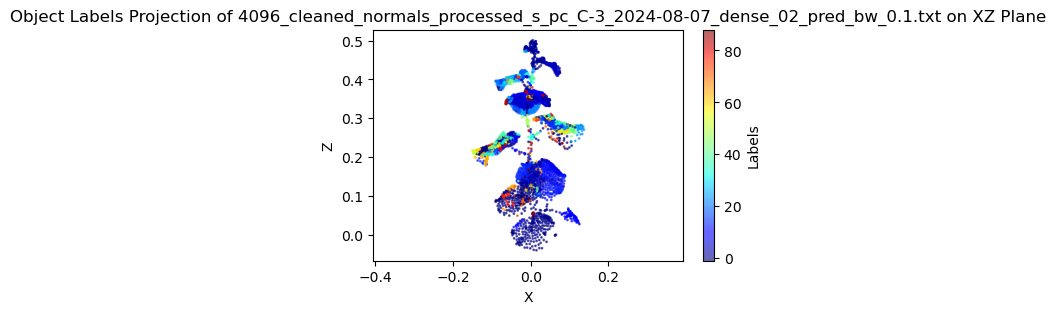

In [8]:
# Extract the X, Z coordinates (XZ plane)
x_coords = point_cloud[:, 0]  # X values
z_coords = point_cloud[:, 2]  # Z values

# Extract the 4th, 5th, and 6th columns (instance, semantic, and object labels)
instance_labels = point_cloud[:, 3]
semantic_labels = point_cloud[:, 4]
object_labels = point_cloud[:, 5]

# Set up a color map
def plot_with_labels(x, z, labels, title):
    plt.figure(figsize=(5, 3))
    scatter = plt.scatter(x, z, c=labels, cmap='jet', s=1, alpha=0.6)
    plt.colorbar(scatter, label='Labels')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.axis('equal')
    plt.show()

# Plot for instance labels
plot_with_labels(x_coords, z_coords, instance_labels, f'Instance Labels Projection of {sorted_files[0]} on XZ Plane')

# Plot for semantic labels
plot_with_labels(x_coords, z_coords, semantic_labels, f'Semantic Labels Projection of {sorted_files[0]} on XZ Plane')

# Plot for object labels
plot_with_labels(x_coords, z_coords, object_labels, f'Object Labels Projection of {sorted_files[0]} on XZ Plane')


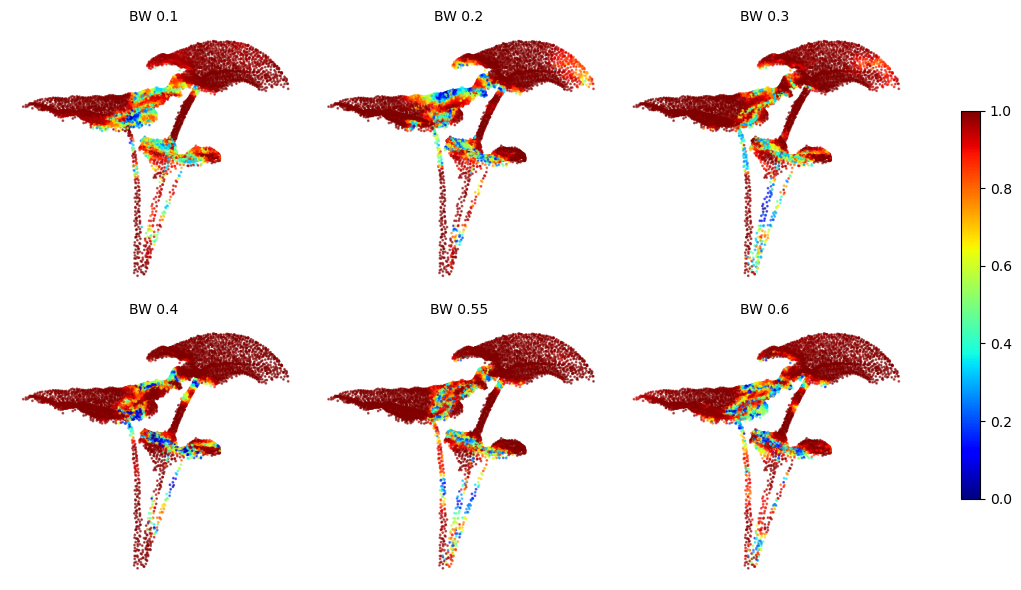

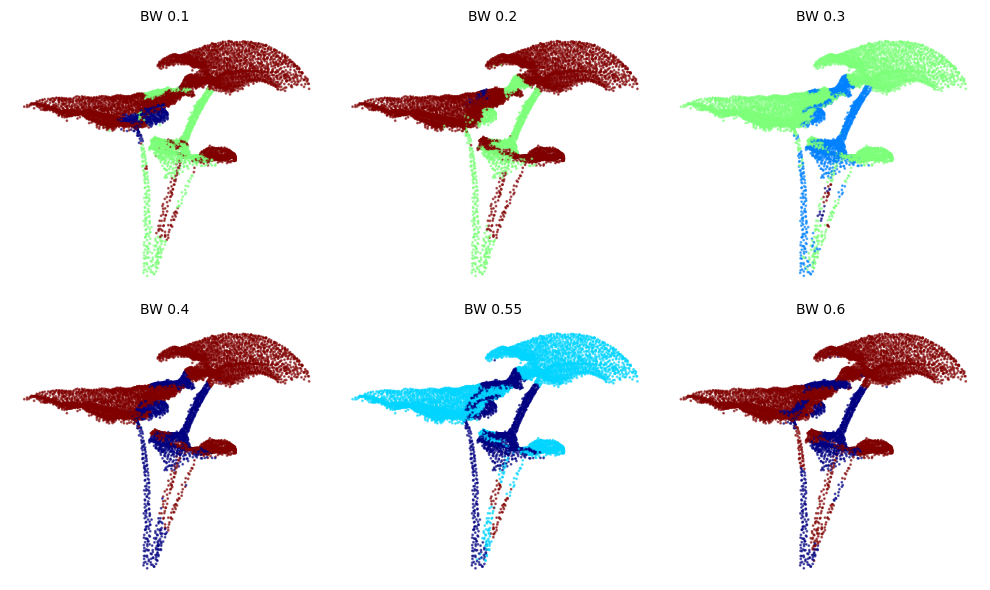

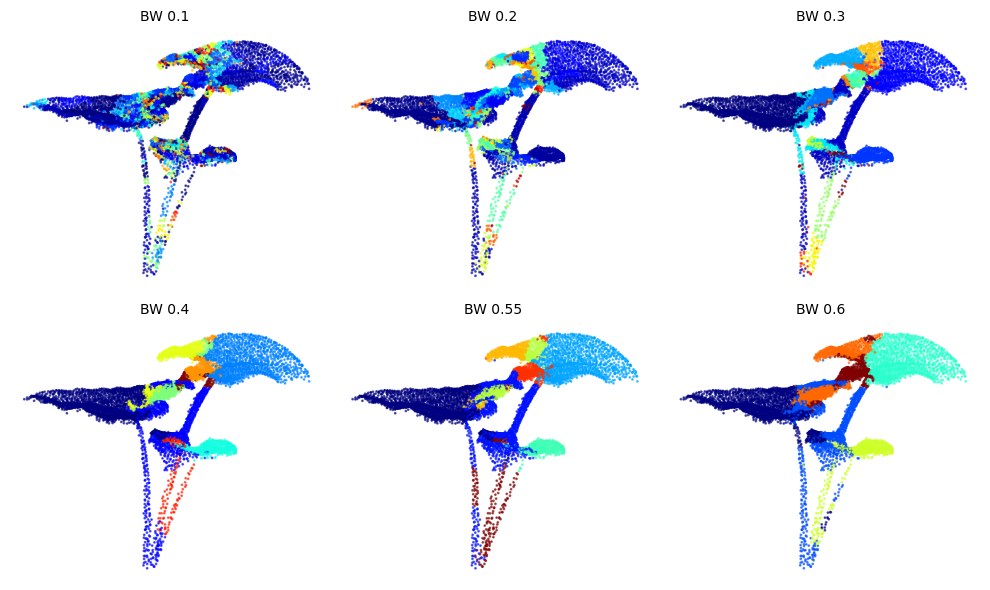

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set up the base path and list all files in the directory
base_path = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/semantic_segemntation/plant405"  # Change this to your actual path
save_dir = "/Users/noahbucher/Documents/Uni/Master Thesis/Writing/graphs/results/segmentation"  # Set your save directory

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

all_files = os.listdir(base_path)

# Filter files that start with "405_plant_SOM_normalized_pred_bw_" and "405_plant_8192_n_a_pred_bw_"
filtered_files = [f for f in all_files if f.startswith("405_plant_8192_n_a_pred_bw_")]

# Sort files by the bandwidth value after "_bw_"
sorted_files = sorted(filtered_files, key=lambda x: float(x.split("_bw_")[-1].replace(".txt", "")))

# Euler angles in radians
x_angle = np.deg2rad(90)  # X1
y_angle = np.deg2rad(-30)   # Y2
z_angle = np.deg2rad(90)   # Z3

# Rotation matrix for the Euler angles
def get_rotation_matrix(x_angle, y_angle, z_angle):
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(x_angle), -np.sin(x_angle)],
                   [0, np.sin(x_angle), np.cos(x_angle)]])
    
    Ry = np.array([[np.cos(y_angle), 0, np.sin(y_angle)],
                   [0, 1, 0],
                   [-np.sin(y_angle), 0, np.cos(y_angle)]])
    
    Rz = np.array([[np.cos(z_angle), -np.sin(z_angle), 0],
                   [np.sin(z_angle), np.cos(z_angle), 0],
                   [0, 0, 1]])
    
    return Rz @ Ry @ Rx

# Apply the rotation to the point cloud
def rotate_point_cloud(point_cloud, rotation_matrix):
    rotated_points = np.dot(point_cloud[:, :3], rotation_matrix.T)
    return rotated_points

# Function to plot data with labels on a given subplot axis
def plot_on_subplot(ax, x, z, labels, title):
    scatter = ax.scatter(x, z, c=labels, cmap='jet', s=1, alpha=0.6)
    ax.set_title(title, fontsize=10)
    ax.axis('off')  # Turn off the axis
    ax.set_frame_on(False)  # Turn off the border/frame
    return scatter

# Get the rotation matrix
rotation_matrix = get_rotation_matrix(x_angle, y_angle, z_angle)

# Set up the number of rows and columns for subplots
n_files = len(sorted_files)
n_cols = 3  # Adjust the number of columns if needed
n_rows = (n_files + n_cols - 1) // n_cols  # Calculate the number of rows

figsize = (10, 6)  # Define a common size

# Create figures for confidence scores, semantic labels, and object labels with the same size
fig_confidence, axs_confidence = plt.subplots(n_rows, n_cols, figsize=figsize)
fig_labels, axs_labels = plt.subplots(n_rows, n_cols, figsize=figsize)
fig_objects, axs_objects = plt.subplots(n_rows, n_cols, figsize=figsize)


# Loop through all files and plot in the respective subplots
for idx, file_name in enumerate(sorted_files):
    # Load the point cloud
    file_path = os.path.join(base_path, file_name)
    point_cloud = np.loadtxt(file_path)
    
    # Extract and rotate the X, Y, Z coordinates
    rotated_points = rotate_point_cloud(point_cloud, rotation_matrix)
    
    # Extract the rotated X and Z coordinates (XZ plane)
    x_coords = rotated_points[:, 0]  # X values
    z_coords = rotated_points[:, 2]  # Z values

    # Extract the confidence scores, semantic labels, and object labels
    confidence_scores = point_cloud[:, 3]
    semantic_labels = point_cloud[:, 4]
    object_labels = point_cloud[:, 5]

    # Get the row and column index for the current subplot
    row = idx // n_cols
    col = idx % n_cols
    
    # Modify title if the file is normalized
    if "normalized" in file_name:
        title_suffix = "_normalized_"
    else:
        title_suffix = ""
    
    # Plot confidence scores
    plot_on_subplot(axs_confidence[row, col], x_coords, z_coords, confidence_scores, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")} {title_suffix}')
    
    # Plot semantic labels
    plot_on_subplot(axs_labels[row, col], x_coords, z_coords, semantic_labels, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")} {title_suffix}')

    # Plot object labels
    plot_on_subplot(axs_objects[row, col], x_coords, z_coords, object_labels, f'BW {file_name.split("_bw_")[-1].replace(".txt", "")} {title_suffix}')

# Adjust layout for better visibility
fig_confidence.tight_layout()
fig_labels.tight_layout()
fig_objects.tight_layout()

# Add colorbars to each figure
fig_confidence.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_confidence, location='right', fraction=0.02)
# fig_labels.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_labels, location='right', fraction=0.02)
# fig_objects.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs_objects, location='right', fraction=0.02)

# Save each plot with a specific name in the save_dir folder
confidence_plot_path = os.path.join(save_dir, "405_confidence_scores_plot.png")
semantic_labels_plot_path = os.path.join(save_dir, "405_semantic_labels_plot.png")
object_labels_plot_path = os.path.join(save_dir, "405_object_labels_plot.png")

fig_confidence.savefig(confidence_plot_path, dpi=300)
fig_labels.savefig(semantic_labels_plot_path, dpi=300)
fig_objects.savefig(object_labels_plot_path, dpi=300)

# Display the plots
plt.show()

